In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from keras.layers import *
from keras.models import Model


In [26]:
from PIL import Image, ImageOps
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from keras.models import load_model

In [3]:
input_shape = (64, 64, 3)
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same", 
                 activation='relu',
                 input_shape=input_shape))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 64)        0

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
Generator = ImageDataGenerator(rescale=1/255.)

In [7]:
train_gen = Generator.flow_from_directory(r'C:\Users\ADMIN\Downloads\deeplearning\python_catdog\220915\train', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

val_gen = Generator.flow_from_directory(r'C:\Users\ADMIN\Downloads\deeplearning\python_catdog\220915\validation', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 602 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [8]:
epochs = 10
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, 
                    epochs=epochs, 
                    validation_data=val_gen)

Epoch 1/10
19/19 [==============================] - 4s 183ms/step - loss: 0.9975 - accuracy: 0.5066 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/10
19/19 [==============================] - 3s 172ms/step - loss: 0.6929 - accuracy: 0.5066 - val_loss: 0.6926 - val_accuracy: 0.5967
Epoch 3/10
19/19 [==============================] - 3s 172ms/step - loss: 0.6920 - accuracy: 0.5365 - val_loss: 0.6928 - val_accuracy: 0.5200
Epoch 4/10
19/19 [==============================] - 3s 169ms/step - loss: 0.6859 - accuracy: 0.5615 - val_loss: 0.6876 - val_accuracy: 0.5833
Epoch 5/10
19/19 [==============================] - 3s 176ms/step - loss: 0.6736 - accuracy: 0.6179 - val_loss: 0.6798 - val_accuracy: 0.6300
Epoch 6/10
19/19 [==============================] - 3s 172ms/step - loss: 0.6325 - accuracy: 0.6628 - val_loss: 0.6561 - val_accuracy: 0.6267
Epoch 7/10
19/19 [==============================] - 3s 165ms/step - loss: 0.5995 - accuracy: 0.6977 - val_loss: 0.6558 - val_accuracy: 0.6300
Epoch 

In [9]:
model.save(r"C:\Users\ADMIN\Downloads\deeplearning\python_catdog\220915\my_model-220915-ver1.h5")

In [10]:
epochs = 40
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, 
                    epochs=epochs, 
                    validation_data=val_gen)

Epoch 1/40
19/19 [==============================] - 4s 193ms/step - loss: 0.4494 - accuracy: 0.7940 - val_loss: 0.6434 - val_accuracy: 0.6383
Epoch 2/40
19/19 [==============================] - 3s 177ms/step - loss: 0.3918 - accuracy: 0.8272 - val_loss: 0.6865 - val_accuracy: 0.6533
Epoch 3/40
19/19 [==============================] - 3s 165ms/step - loss: 0.3697 - accuracy: 0.8439 - val_loss: 0.6741 - val_accuracy: 0.6600
Epoch 4/40
19/19 [==============================] - 3s 161ms/step - loss: 0.3292 - accuracy: 0.8704 - val_loss: 0.6900 - val_accuracy: 0.6433
Epoch 5/40
19/19 [==============================] - 3s 159ms/step - loss: 0.2804 - accuracy: 0.8904 - val_loss: 0.7031 - val_accuracy: 0.6667
Epoch 6/40
19/19 [==============================] - 3s 161ms/step - loss: 0.2499 - accuracy: 0.9020 - val_loss: 0.7286 - val_accuracy: 0.6633
Epoch 7/40
19/19 [==============================] - 3s 161ms/step - loss: 0.2070 - accuracy: 0.9136 - val_loss: 0.7537 - val_accuracy: 0.6867
Epoch 

In [11]:
model.save(r"C:\Users\ADMIN\Downloads\deeplearning\python_catdog\220915\my_model-220915-epoch50.h5")

In [15]:
from keras.models import load_model

In [16]:
model = load_model(r'C:\Users\ADMIN\Downloads\deeplearning\python_catdog\220915\my_model-220915-ver1.h5')

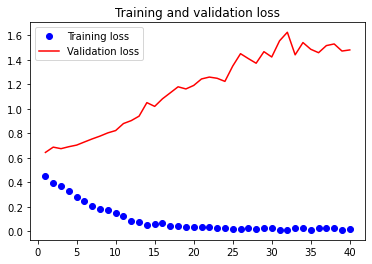

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
test_gen = Generator.flow_from_directory (r'C:\Users\ADMIN\Downloads\deeplearning\python_catdog\train\train', target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')

Found 25000 images belonging to 2 classes.


In [22]:
score = model.evaluate(test_gen, verbose=0)
print(f'Test loss: {score[0]:.3f}')
print(f'Test accuracy: {score[1]:.3f}')

Test loss: 0.654
Test accuracy: 0.634


In [23]:
import numpy as np

x_tests, y_tests = [], []
for i in range(len(test_gen)):
  x_test, y_test = next(test_gen)
  x_tests.append(x_test)
  y_tests.append(y_test)

x_test = np.concatenate(x_tests, axis=0)
y_test = np.concatenate(y_tests, axis=0)

print(x_test.shape)
print(y_test.shape)

(25000, 64, 64, 3)
(25000,)


In [24]:
pred = model.predict(x_test[:25000])

print(pred)
# for i in range(4):
#    plt.imshow(x_test[i])
#    plt.title(pred[i])
#    plt.show()

782/782 [==============================] - 13s 17ms/step
[[0.6388203 ]
 [0.44409272]
 [0.9762753 ]
 ...
 [0.5722553 ]
 [0.49792293]
 [0.65900266]]


In [ ]:
from PIL import Image, ImageOps
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [27]:
ex63 = pd.DataFrame(pred)

In [28]:
print(ex63)

              0
0      0.638820
1      0.444093
2      0.976275
3      0.648106
4      0.347574
...         ...
24995  0.059427
24996  0.429309
24997  0.572255
24998  0.497923
24999  0.659003

[25000 rows x 1 columns]


In [29]:
ex63.to_excel(excel_writer=r'C:\Users\ADMIN\Downloads\deeplearning\python_catdog\test1-220915-epoch10.xlsx')